# CTA 1.0

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from cvx.simulator import FuturesPortfolio
from cvx.simulator import interpolate

In [2]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True)

# interpolate the prices
prices = prices.apply(interpolate)

In [3]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=100).mean()
    f = price.ewm(com=fast, min_periods=100).mean()
    return np.sign(f-s) 

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average")])
right_box = VBox([fast, slow])
HBox([left_box, right_box])

In [5]:
pos = 5e6*prices.apply(f, fast=fast.value, slow=slow.value).fillna(0.0)
portfolio = FuturesPortfolio.from_cashpos_prices(prices=prices, cashposition=pos, aum=1e8)

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)


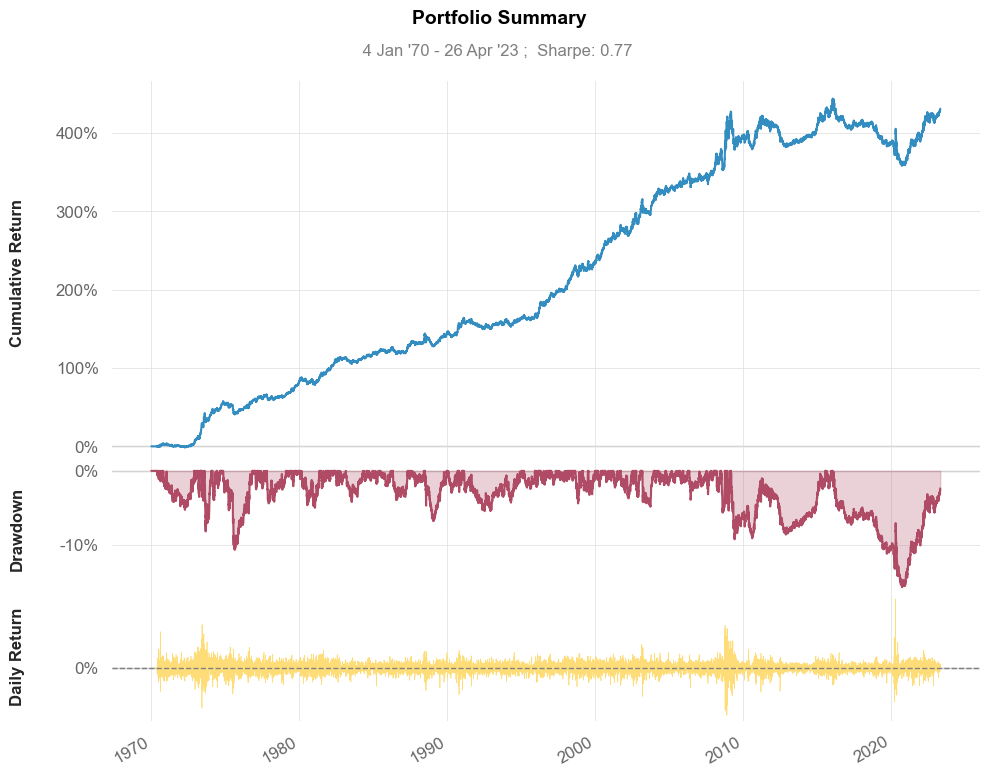

In [6]:
portfolio.snapshot()

In [7]:
pd.set_option('display.precision', 2)
portfolio.metrics()

                    Strategy
------------------  ----------
Start Period        1970-01-05
End Period          2023-04-26
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   431.07%
CAGR﹪              2.18%

Sharpe              0.77
Prob. Sharpe Ratio  100.0%
Sortino             1.13
Sortino/√2          0.8
Omega               1.15

Max Drawdown        -15.79%
Longest DD Days     2653

Gain/Pain Ratio     0.15
Gain/Pain (1M)      0.85

Payoff Ratio        1.04
Profit Factor       1.15
Common Sense Ratio  1.21
CPC Index           0.63
Tail Ratio          1.05
Outlier Win Ratio   3.84
Outlier Loss Ratio  3.8

MTD                 0.76%
3M                  2.06%
6M                  1.61%
YTD                 2.4%
1Y                  3.12%
3Y (ann.)           2.55%
5Y (ann.)           0.54%
10Y (ann.)          0.6%
All-time (ann.)     2.18%

Avg. Drawdown       -0.93%
Avg. Drawdown Days  53
Recovery Factor     10.86
Ulcer Index         0.04
Serenity Index      1.27


cvxSimulator can construct portfolio objects. Those objects will expose functionality and attributes supporting all analytics.
There are two types of portfolio -- EquityPortfolio and FuturesPortfolio. We start with the FuturesPortfolio. The most simple use-case
is when we have computed all desirec cash-positions 